In [93]:
import re, string,os
from glob import glob as gb
import pandas as pd
from collections import Counter
from tqdm import tqdm
from datetime import datetime, timedelta, date
from collections import OrderedDict
import subprocess
from FrequencyParser import *
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
months = "2019-09 2019-10 2019-11 2019-12 2020-01 2020-02 2020-03 2020-04 2020-05 2020-06 2020-07 2020-08".split(' ')
words = "lekarz lekarze pielęgniarka opiekun".split(' ')
parsing_obj = FrequencyParser(words=words,months=months)
dfr = parsing_obj.Parse()
totals = parsing_obj.month_totals()

In [95]:
pdf = []

for m in months:
    tts = [m]

    for w in words:
        s = dfr[(dfr['id'].str.contains(m)) & (dfr[f'{w}_hits'] > 0)][f'{w}_hits'].sum() / totals[m] * 100
        tts.append(s)
    pdf.append(tts)

In [96]:
# Plot - Set Visuals
sns.set(font='Inter, Medium',rc={'axes.axisbelow': True,'axes.edgecolor': 'lightgrey','axes.facecolor': 'None', 'axes.grid': True,'grid.color':'lightblue','axes.labelcolor':'dimgrey','axes.spines.top': True,'figure.facecolor': 'white','lines.solid_capstyle': 'round','patch.edgecolor': 'w','patch.force_edgecolor': True,'text.color': 'dimgrey','xtick.bottom': False,'xtick.color': 'dimgrey','xtick.direction': 'out','xtick.top': False,'ytick.color': 'dimgrey','ytick.direction': 'out','ytick.left': False, 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,"axes.titlesize":20, "axes.labelsize":16})
sns.set_palette("Accent",9)

In [97]:
df = pd.DataFrame(pdf)

cols = ["m"]

for c,i in enumerate(list(df.columns)[1:]):
    cols.append(words[c])
df.columns = cols

colors = ["salmon","teal","forestgreen","lightslategray","crimson","powderblue","lightpink"]


Text(0, 0.5, 'Relative Frequency')

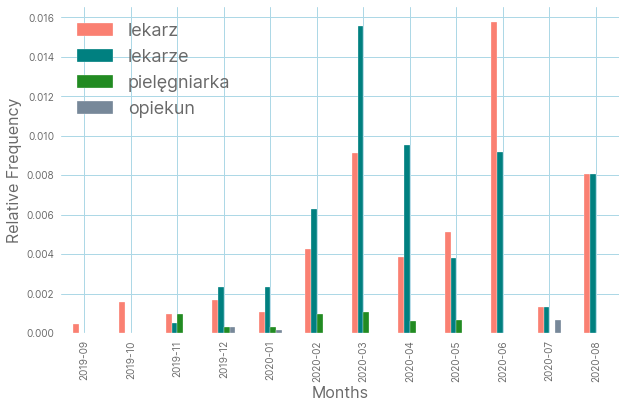

In [98]:
df.plot.bar(x='m',y=words,stacked=False,color=colors,figsize=(10,6))
plt.legend(fontsize=18)
plt.xlabel('Months')
plt.ylabel('Relative Frequency')

In [31]:
list(df.columns)[1:]

['koronawirusem', 'koronawirus', 'wirus', 'wirusem']